In [19]:
import numpy as np
import h5py

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
h5f = h5py.File("/home/yicheng-wang/CS-Stuff/machine_learning/Sentence-VAE/sentiment_data/encoded_results.hdf5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [21]:
means = h5f['means'][:]

Explained variation per principal component: [0.23455487 0.21410233 0.15138876]


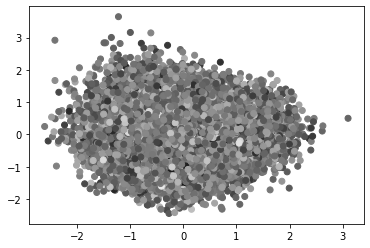

In [22]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(means)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.scatter(pca_result[:,0], pca_result[:,1], c=pca_result[:,2])
plt.gray()
plt.show()

In [23]:
for d in range(means.shape[1]):
    print(d)
    print(np.min(means[:,d]), np.max(means[:,d]))

0
-2.5492682 1.4129298
1
-2.7956479 2.3790805
2
-2.3300855 2.3157349
3
-3.7115254 -0.5004316
4
-2.1596987 2.073927
5
-2.0088408 1.5368748
6
-2.6273272 2.299993
7
-2.2353897 2.2348437


In [24]:
def get_mesh(means, steps_along_d = 10):
    xis = []
    for d in range(means.shape[1]):
        xis.append(np.linspace(np.min(means[:, d]), np.max(means[:, d]), steps_along_d+2))
    return np.meshgrid(*xis)

In [26]:
mesh = get_mesh(means, steps_along_d=6)

8